<a href="https://colab.research.google.com/drive/1Nq7ZJD4giZTY24i1DAz53EDC-b931lTJ?usp=sharing">Colab link</a>

## **Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from random import randrange

## **Training Samples**

In [2]:
X = np.array([[1   , 0.7 , 0.1 ],
              [1   , 1   , 1   ],
              [0.25, 0.95, 0.9 ],
              [0.1 , 0.95, 0.85],
              [0.87, 0   , 0.1 ],
              [0.82, 0.2 , 0.14],
              [0.8 , 0.2 , 0.2 ],
              [0   , 0.85, 1   ],
              [1   , 0   , 0   ],
              [0.17, 1   , 0.8 ],
              [0.9 , 0.1 , 0.1 ],
              [0.85, 0.2 , 0.2 ],
              [0.2 , 0.9 , 0.8 ],
              [0.3 , 0.9 , 0.9 ],
              [0   , 1   , 1   ],
              [0.1 , 0.85, 0.9 ],
              [0.92, 0.15, 0.1 ],
              [1   , 0.13, 0.2 ]])
X.shape

(18, 3)

In [3]:
Y = np.array([[0],
              [1],
              [1],
              [1],
              [0],
              [0],
              [0],
              [1],
              [0],
              [1],
              [0],
              [0],
              [1],
              [1],
              [1],
              [1],
              [0],
              [0]],dtype=np.int8)
Y.shape

(18, 1)

## **Plot Data in 3D**

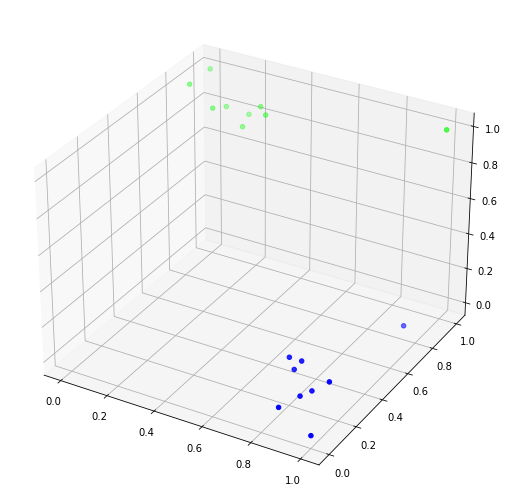

In [16]:
##### Plot main Samples in 3D #####
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y, depthshade=True,cmap='brg')

In [17]:
Train = np.concatenate((X,Y),axis=1)
Train.shape

(18, 4)

## **LVQ1 Model Implementation From Scratch**

In [18]:
##### Implement your LVQ1 model here#####

class LVQ:

    def __init__(self, epochs, alpha):
        self.epochs = epochs
        self.alpha = alpha
        self.random_codebooks = []
        
    # euclidean_distance
    def euclidean_distance(self,row1,row2):
        distance = 0.0
        for i in range(len(row1)-1):
            distance += (row1[i] - row2[i])**2
        return sqrt(distance)
    
    # Best Matching Unit (BMU)
    def get_best_matching_unit(self,codebooks, test_row):
        distances = list()
        for codebook in codebooks:
            dist = self.euclidean_distance(codebook, test_row)
            distances.append((codebook, dist))
            
        distances.sort(key=lambda tup: tup[1])
        return distances[0][0]
    
    # Create a random codebook vector
    def random_codebook(self,train):
        n_records = len(train)
        n_features = len(train[0])
        codebook = [train[randrange(n_records)][i] for i in range(n_features)]
        return codebook

    # Train a set of codebook vectors
    def train_codebooks(self,train, n_codebooks):
        lrate = self.alpha
        codebooks = [self.random_codebook(train) for i in range(n_codebooks)]
        self.random_codebooks = codebooks
        
        for epoch in range(self.epochs):
            trained_data = []
            rate = lrate * (1.0-(epoch/float(self.epochs)))
            sum_error = 0.0
            
            for row in train:
                bmu = self.get_best_matching_unit(codebooks, row)
                
                for i in range(len(row)-1):
                    error = row[i] - bmu[i]
                    sum_error += error**2
                    
                    if bmu[-1] == row[-1]:
                        bmu[i] += rate * error
                    else:
                        bmu[i] -= rate * error
                    
                trained_data.append(bmu)
                    
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, rate, sum_error))
            
        return codebooks,trained_data
    
    # Make a prediction with codebook vectors
    def predict(self,codebooks, test_row):
        bmu = self.get_best_matching_unit(codebooks, test_row)
        return bmu[-1]

In [22]:
# test euclidean distance function
row0 = Train[0]
for row in Train:
    distance = lvq.euclidean_distance(row0, row)
    print(distance)

0.0
0.9486832980505139
1.1247221879201994
1.1979148550710939
0.7119691004531025
0.532916503778969
0.5477225575051661
1.3536986370680884
0.7071067811865475
1.1264546151532249
0.6082762530298219
0.5315072906367324
1.0816653826391969
1.0816653826391966
1.3784048752090223
1.2134661099511597
0.5557877292636101
0.5787054518492114


In [23]:
# test BMU 
test_row = Train[0]
bmu = lvq.get_best_matching_unit(Train, test_row)
print(bmu)

[1.  0.7 0.1 0. ]


## **Train Model**

In [189]:
# create model
lvq = LVQ(epochs=20, alpha=0.03)

trained_codebooks,trained_data = lvq.train_codebooks(Train,20)
trained_data = np.array(trained_data)

>epoch=0, lrate=0.030, error=0.549
>epoch=1, lrate=0.028, error=0.523
>epoch=2, lrate=0.027, error=0.523
>epoch=3, lrate=0.025, error=0.493
>epoch=4, lrate=0.024, error=0.440
>epoch=5, lrate=0.022, error=0.406
>epoch=6, lrate=0.021, error=0.384
>epoch=7, lrate=0.019, error=0.369
>epoch=8, lrate=0.018, error=0.357
>epoch=9, lrate=0.017, error=0.345
>epoch=10, lrate=0.015, error=0.336
>epoch=11, lrate=0.013, error=0.330
>epoch=12, lrate=0.012, error=0.325
>epoch=13, lrate=0.010, error=0.321
>epoch=14, lrate=0.009, error=0.318
>epoch=15, lrate=0.007, error=0.315
>epoch=16, lrate=0.006, error=0.313
>epoch=17, lrate=0.005, error=0.312
>epoch=18, lrate=0.003, error=0.310
>epoch=19, lrate=0.002, error=0.310


## **Plot Data in 3D**

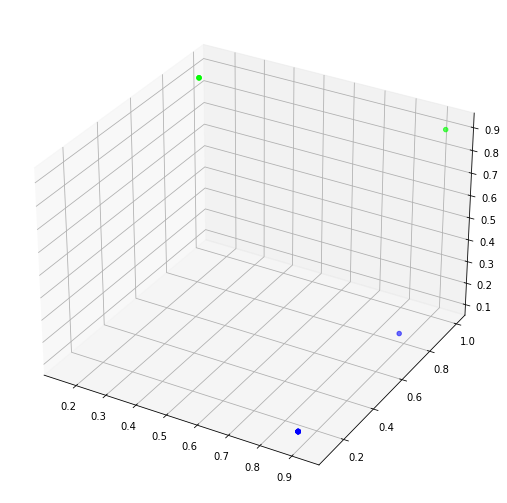

In [190]:
# after
##### Plot Samples Again To Observe The Changes In Prototypes After Training #####
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trained_data[:,0], trained_data[:,1], trained_data[:,2],c=Y, depthshade=True,cmap='brg')

## **Test Model**

In [191]:
##### Test The Model With The Given Sample #####

test_sample = np.array([[0.19, 0.93, 0.88]])

prediction = []

for i in range(len(test_sample)):
    prediction.append(lvq.predict(trained_codebooks,test_sample[i]))

print('predicted class for {} is {}'.format(test_sample[0],prediction))

predicted class for [0.19 0.93 0.88] is [1.0]
